<a href="https://colab.research.google.com/github/engineerjhjung/ai_project/blob/main/AI_05_%EC%A0%95%EC%A4%80%ED%9D%AC_SECTION2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## PROJECT 2

---

In [ ]:
!pip install pandas-profiling==2.11.0
!pip install -U pandas-profiling

     |████████████████████████████████| 243 kB 15.0 MB/s 
     |████████████████████████████████| 3.1 MB 49.8 MB/s 
     |████████████████████████████████| 62 kB 866 kB/s 
     |████████████████████████████████| 675 kB 49.5 MB/s 
     |████████████████████████████████| 75 kB 4.2 MB/s 
     |████████████████████████████████| 812 kB 46.6 MB/s 
     |████████████████████████████████| 28.5 MB 46 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=754e3358bef7d1aa2364667bee743eea76ad714d254af930fe39ecbb4d47bff6
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=d1be1bc36da5a9d341978dd806cf0cdcb04ef0d6724d4647c7e510651a9a4ed2
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    

In [ ]:
!pip install category_encoders

In [ ]:
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 사이킷런 - 데이터 셋 나누기
from sklearn.model_selection import train_test_split

# 사이킷런 - encoders & imputers
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer 

# 사이킷런 - 파이프라인
from sklearn.pipeline import make_pipeline

# 사이킷런 - 학습모델
from sklearn.ensemble import RandomForestClassifier

# 사이킷런 - 모델 평가 지표
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/test/fake_job_postings.csv")
df.shape

(17880, 18)

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
# 컬럼 확인
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
!pip install pandas-profiling==2.11.0

     |████████████████████████████████| 243 kB 25.6 MB/s 
     |████████████████████████████████| 675 kB 36.8 MB/s 
     |████████████████████████████████| 75 kB 3.6 MB/s 
     |████████████████████████████████| 3.1 MB 41.1 MB/s 
     |████████████████████████████████| 62 kB 973 kB/s 
     |████████████████████████████████| 812 kB 43.0 MB/s 
     |████████████████████████████████| 28.5 MB 48 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=2fa52f65b7e0323c8f726dfdd9928e04a2710215ad0354f202334d837a5993f7
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=f71300ea5c6c45314bd0a41ab94939a56d39197e64d87eb76dea776b8e27c383
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    

In [ ]:
from pandas_profiling import ProfileReport

ProfileReport(df, title="fakejobposting")

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### EDA (ref.)

In [ ]:
# 데이터타입 확인
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 결측치 확인
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
# 중복값 확인
df.T.duplicated()

job_id                 False
title                  False
location               False
department             False
salary_range           False
company_profile        False
description            False
requirements           False
benefits               False
telecommuting          False
has_company_logo       False
has_questions          False
employment_type        False
required_experience    False
required_education     False
industry               False
function               False
fraudulent             False
dtype: bool

In [ ]:
"""
job_id: Unique Job ID
title: The title of the job ad entry
location: Geographical location of the job ad
department: Corporate department (e.g. sales)
salary_range: Indicative salary range (e.g. $50,000-60,000)
company_profile: A brief company description
description: The details description of the job ad
requirements: Enlisted requirements for the job opening
benefits: Enlisted offered benefits by the employer
telecommuting: True for telecommuting positions
has_company_logo: True if company logo is present
has_questions: True if screening questions are present
employment_type: Full-type, Part-time, Contract, etc
required_experience: Executive, Entry level, Intern, etc
required_education: Doctorate, Master’s Degree, Bachelor, etc
industry: Automotive, IT, Health care, Real estate, etc
function: Consulting, Engineering, Research, Sales etc
fraudulent: 
"""

'\njob_id: Unique Job ID\ntitle: The title of the job ad entry\nlocation: Geographical location of the job ad\ndepartment: Corporate department (e.g. sales)\nsalary_range: Indicative salary range (e.g. $50,000-60,000)\ncompany_profile: A brief company description\ndescription: The details description of the job ad\nrequirements: Enlisted requirements for the job opening\nbenefits: Enlisted offered benefits by the employer\ntelecommuting: True for telecommuting positions\nhas_company_logo: True if company logo is present\nhas_questions: True if screening questions are present\nemployment_type: Full-type, Part-time, Contract, etc\nrequired_experience: Executive, Entry level, Intern, etc\nrequired_education: Doctorate, Master’s Degree, Bachelor, etc\nindustry: Automotive, IT, Health care, Real estate, etc\nfunction: Consulting, Engineering, Research, Sales etc\nfraudulent: target - Classification attribute\n'

In [ ]:
# features- object컬럼의 cardinality확인

# object 타입의 features를 고르기
object_data = []

for col in df.columns:
    if df[col].dtype=="object":
        object_data.append(col)
    

object_data

['title',
 'location',
 'department',
 'salary_range',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function']

In [ ]:
df[object_data].describe().T.sort_values(by='unique')

,count,unique,top,freq
employment_type,14409,5,Full-time,11620
required_experience,10830,7,Mid-Senior level,3809
required_education,9775,13,Bachelor's Degree,5145
function,11425,37,Information Technology,1749
industry,12977,131,Information Technology and Services,1734
salary_range,2868,874,0-0,142
department,6333,1337,Sales,551
company_profile,14572,1709,We help teachers get safe &amp; secure jobs ab...,726
location,17534,3105,"GB, LND, London",718
benefits,10670,6205,See job description,726


In [ ]:
# target - 구성 비율 확인 & 시각화
target = 'fraudulent'
proportion = pd.DataFrame(df['fraudulent'].value_counts())
proportion

,fraudulent
0,17014
1,866


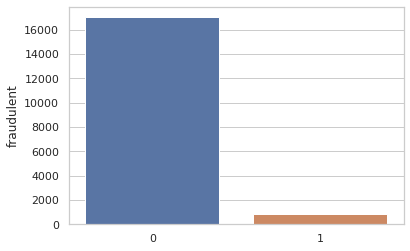

In [ ]:
# 시각화
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=proportion.index, y=target, data=proportion)
plt.show()

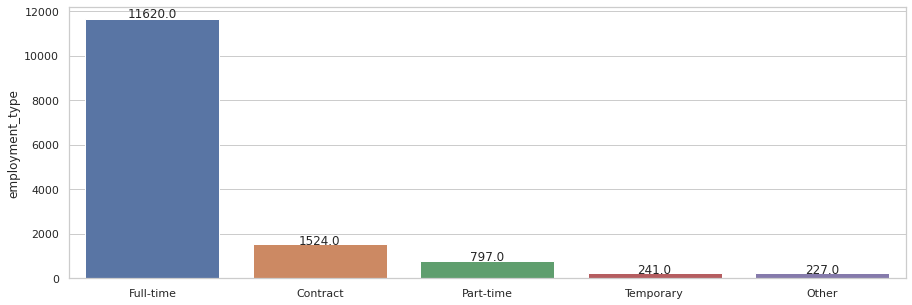

In [ ]:
# employment_type - 시각화
df_emp = pd.DataFrame(df["employment_type"].value_counts())

sns.set_theme(style="whitegrid")
plt.subplots(figsize=(15, 5))
ax = sns.barplot(x=df_emp.index, y="employment_type", data=df_emp, order = df_emp.index)

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate(p.get_height(), (left+width/2, height*1.01), ha='center')
    
plt.show()

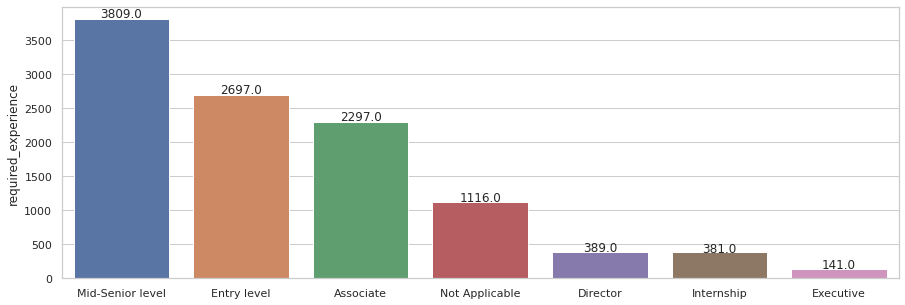

In [ ]:
# required_experience - 시각화
df_req = pd.DataFrame(df["required_experience"].value_counts())

sns.set_theme(style="whitegrid")
plt.subplots(figsize=(15, 5))
ax = sns.barplot(x=df_req.index, y="required_experience", data=df_req, order =df_req.index)

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate(p.get_height(), (left+width/2, height*1.01), ha='center')
    
plt.show()

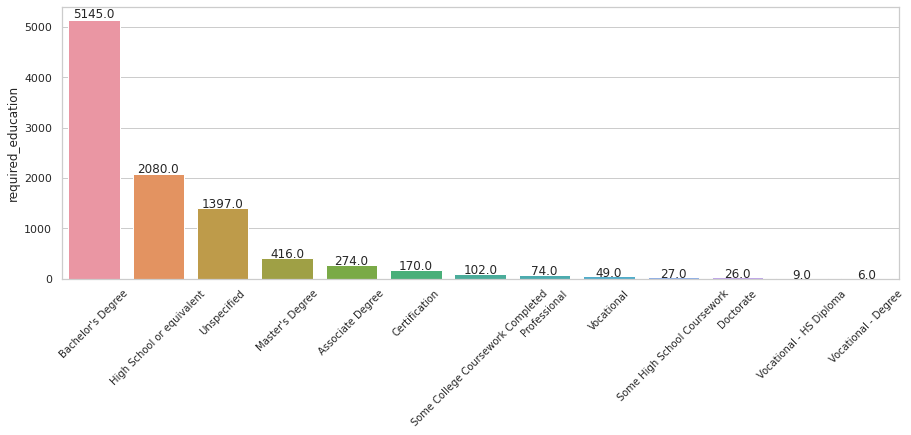

In [ ]:
# required_education - 시각화
df_edu = pd.DataFrame(df["required_education"].value_counts())

sns.set_theme(style="whitegrid")
plt.subplots(figsize=(15, 5))
plt.xticks(rotation = 45, fontweight='light', fontsize='small' )
ax = sns.barplot(x=df_edu.index, y="required_education", data=df_edu, order =df_edu.index)

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate(p.get_height(), (left+width/2, height*1.01), ha='center')
    
plt.show()

In [ ]:
df_industry = pd.DataFrame(df["industry"].value_counts())
df_industry_20 = df_industry.iloc[0:20, :]
df_industry_20

,industry
Information Technology and Services,1734
Computer Software,1376
Internet,1062
Marketing and Advertising,828
Education Management,822
Financial Services,779
Hospital & Health Care,497
Consumer Services,358
Telecommunications,342
Oil & Energy,287


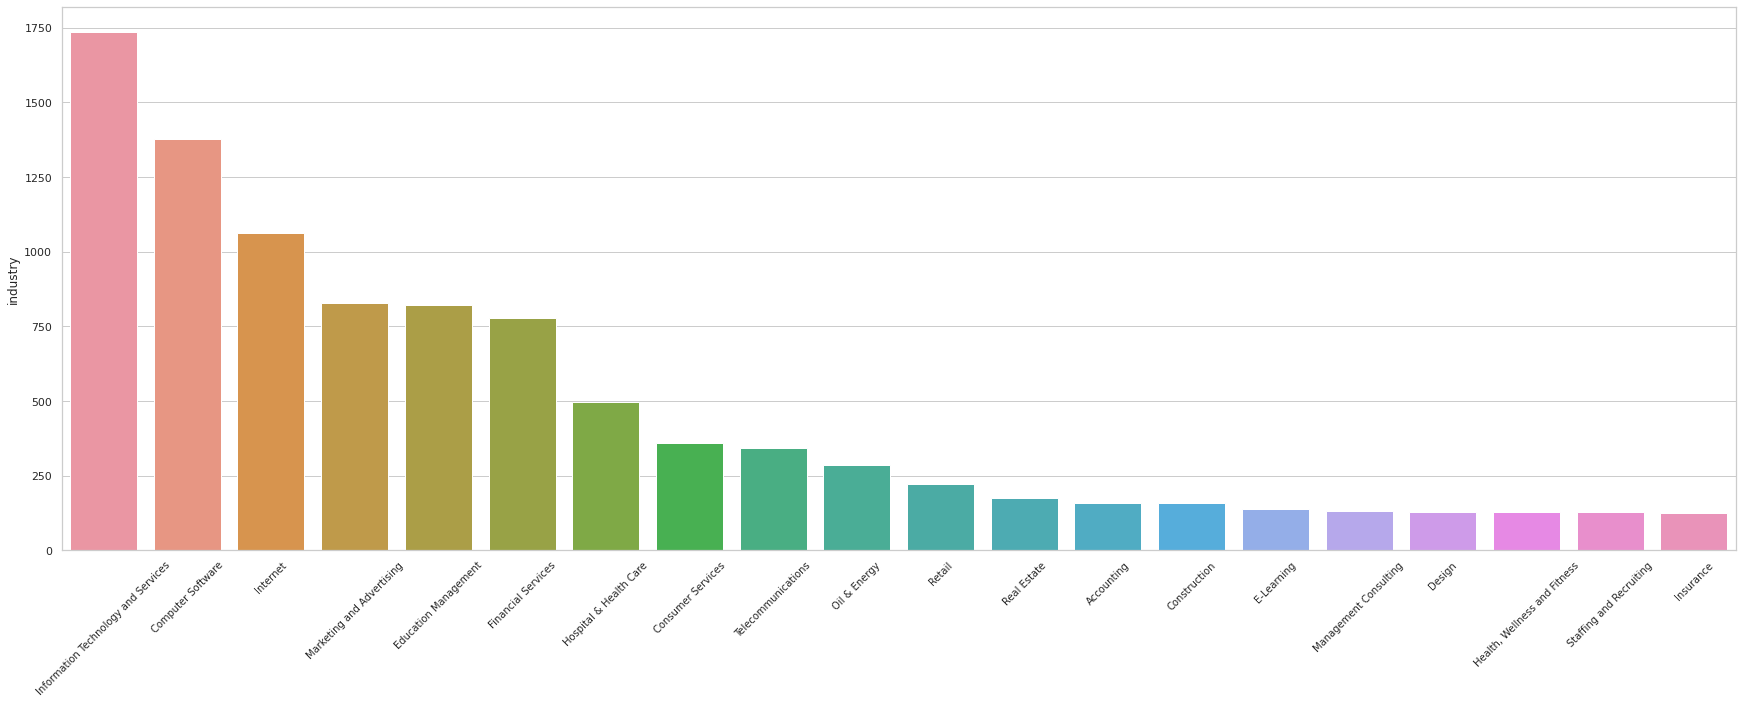

In [ ]:
# industry 시각화로 현황 파악#

sns.set_theme(style="whitegrid")
plt.subplots(figsize=(30,10))
plt.xticks(rotation = 45, fontweight='light', fontsize='small' )
ax = sns.barplot(x=df_industry_20.index, y="industry", data=df_industry_20)

plt.show()

### Feature Engineering (ref.)

In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
# cardinality가 높고, 타겟값과 연관성이 없는 job_id 삭제
df.drop(['job_id'], axis=1, inplace=True)
df.shape

(17880, 17)

In [ ]:
train, test = train_test_split(df)
target = 'fraudulent'
# train을 features & target으로 나눈다.
y_train = train[target]
X_train = train.drop(target, axis=1)

y_test = test[target]
X_test = test.drop(target, axis=1)
# 데이터셋 크기 확인 (train의 features, train의 target의 row수가 일치해야 한다.)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4608, 13), (4608,), (1536, 13), (1536,))

In [ ]:
# 모델 성능 유추를 위한 검증 데이터셋 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 0)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((10728, 16), (10728,), (2682, 16), (2682,), (4470, 16), (4470,))

### baseline model


In [ ]:
# 기준 모델 만들기
base = y_train.mode()[0]

# 타겟 샘플수 만큼 0이 담긴 리스트 생성
y_pred = [base] * len(y_train)

In [ ]:

from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

training accuracy:  0.9515287099179717
validation accuracy:  0.9545115585384042


In [ ]:
df.shape

(17880, 17)

In [ ]:
# 1. 모든 특성을 일괄적으로 OneHotEncoding // 모든 데이터
pipe1 = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(missing_values=np.nan, strategy='constant'), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe1.fit(X_train, y_train)
print('검증 정확도: ', pipe1.score(X_val, y_val))

y_pred1 = pipe1.predict(X_val)
print('검증 f1: ', f1_score(y_val, y_pred1))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도:  0.9761372110365399
검증 f1:  0.7192982456140351


In [ ]:
# 1. OneHotEncoding, RandomForest // v2
pipe1 = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(missing_values=np.nan, strategy='constant'), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe1.fit(X_train, y_train)
print('검증 정확도: ', pipe1.score(X_val, y_val))

y_pred1 = pipe1.predict(X_val)
print('검증 f1: ', f1_score(y_val, y_pred1))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도:  0.9837310195227765
검증 f1:  0.6938775510204082


In [ ]:
# 2. 모든 특성 OrdinalEncoding // 모든 데이터
pipe2 = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(missing_values=np.nan, strategy='constant'), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe2.fit(X_train, y_train)
print('검증 정확도: ', pipe2.score(X_val, y_val))

y_pred2 = pipe2.predict(X_val)
print('검증 f1: ', f1_score(y_val, y_pred2))

검증 정확도:  0.9675615212527964
검증 f1:  0.5538461538461539


In [ ]:
# 2. OrdinalEncoding, RandomForest // v2
pipe2 = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(missing_values=np.nan, strategy='constant'), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe2.fit(X_train, y_train)
print('검증 정확도: ', pipe2.score(X_val, y_val))

y_pred2 = pipe2.predict(X_val)
print('검증 f1: ', f1_score(y_val, y_pred2))

검증 정확도:  0.9750542299349241
검증 f1:  0.4888888888888889


In [ ]:
df.head(3)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
# 3. 로지스틱으로 예 // 모든 데이터 <= 안 돌아감

pipe = make_pipeline(
    OneHotEncoder(), 
    SimpleImputer(missing_values=np.nan, strategy='constant'), 
    StandardScaler(), 
    LogisticRegression(n_jobs=-1)
)
pipe.fit(X_train, y_train)
print('검증세트 정확도', pipe.score(X_val, y_val))

y_pred = pipe.predict(X_val)
print('검증 f1: ', f1_score(y_val, y_pred))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
# 3. OneHotEncoding, Logistic // v2

pipe3 = make_pipeline(
    OneHotEncoder(), 
    SimpleImputer(missing_values=np.nan, strategy='constant'), 
    StandardScaler(), 
    LogisticRegression(n_jobs=-1)
)
pipe3.fit(X_train, y_train)
print('검증세트 정확도', pipe3.score(X_val, y_val))

y_pred = pipe3.predict(X_val)
print('검증 f1: ', f1_score(y_val, y_pred))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증세트 정확도 0.9804772234273319
검증 f1:  0.6086956521739131


In [ ]:
# 트리결정모델 v2일 때 하이퍼파라미터 튜닝
import numpy as np
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

def DecisionTree(depth = None, leaf = 1) :
   return make_pipeline(
       OneHotEncoder(use_cat_names=True),
       SimpleImputer(),
       DecisionTreeClassifier(max_depth = depth, min_samples_leaf = leaf, random_state=1, criterion='entropy'))

for i in np.arange(1, 20) :
  pipe = DecisionTree(i)
  pipe.fit(X_train, y_train)
  y_val_pred = pipe.predict(X_val)
  f1 = f1_score(y_val, y_val_pred)
  print('depth : ', i)
  print('training accuracy: ', pipe.score(X_train, y_train))
  print('validation accuracy: ', pipe.score(X_val, y_val))
  print(f'f1 score for validation : {f1}') 


pipe = DecisionTree(10)
pipe.fit(X_train, y_train)
y_val_pred = pipe.predict(X_val)
f1 = f1_score(y_val, y_val_pred)
print('depth : ', i)
print('result training accuracy: ', pipe.score(X_train, y_train))
print('result validation accuracy: ', pipe.score(X_val, y_val))
print(f'result f1 score for validation : {f1}')

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  1
training accuracy:  0.9715138361367336
validation accuracy:  0.96529284164859
f1 score for validation : 0.0


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  2
training accuracy:  0.9799240368963646
validation accuracy:  0.9696312364425163
f1 score for validation : 0.2222222222222222


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  3
training accuracy:  0.9834508952794357
validation accuracy:  0.9718004338394793
f1 score for validation : 0.3157894736842105


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  4
training accuracy:  0.9864351600651112
validation accuracy:  0.9793926247288504
f1 score for validation : 0.5777777777777777


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  5
training accuracy:  0.9880629408572978
validation accuracy:  0.9815618221258134
f1 score for validation : 0.6382978723404256


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  6
training accuracy:  0.9902333152468801
validation accuracy:  0.9837310195227765
f1 score for validation : 0.6938775510204082


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  7
training accuracy:  0.9913185024416712
validation accuracy:  0.9848156182212582
f1 score for validation : 0.72


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  8
training accuracy:  0.9924036896364623
validation accuracy:  0.9848156182212582
f1 score for validation : 0.72


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  9
training accuracy:  0.9932175800325557
validation accuracy:  0.9859002169197397
f1 score for validation : 0.7450980392156863


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  10
training accuracy:  0.9940314704286489
validation accuracy:  0.9880694143167028
f1 score for validation : 0.7924528301886793


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  11
training accuracy:  0.9948453608247423
validation accuracy:  0.9891540130151844
f1 score for validation : 0.8148148148148148


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  12
training accuracy:  0.9953879544221378
validation accuracy:  0.9891540130151844
f1 score for validation : 0.8148148148148148


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  13
training accuracy:  0.9959305480195334
validation accuracy:  0.9891540130151844
f1 score for validation : 0.8148148148148148


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  14
training accuracy:  0.9964731416169289
validation accuracy:  0.9891540130151844
f1 score for validation : 0.8148148148148148


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  15
training accuracy:  0.9970157352143245
validation accuracy:  0.9891540130151844
f1 score for validation : 0.8148148148148148


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  16
training accuracy:  0.99755832881172
validation accuracy:  0.9891540130151844
f1 score for validation : 0.8148148148148148


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  17
training accuracy:  0.9978296256104178
validation accuracy:  0.9891540130151844
f1 score for validation : 0.8148148148148148


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  18
training accuracy:  0.9981009224091155
validation accuracy:  0.9891540130151844
f1 score for validation : 0.8148148148148148


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  19
training accuracy:  0.9983722192078134
validation accuracy:  0.9891540130151844
f1 score for validation : 0.8148148148148148


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


depth :  19
result training accuracy:  0.9940314704286489
result validation accuracy:  0.9880694143167028
result f1 score for validation : 0.7924528301886793


In [ ]:
# 4. Decision Tree // 모든 데이터
from sklearn.tree import DecisionTreeClassifier
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=1, criterion='entropy')
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

y_pred = pipe.predict(X_val)
print('검증 f1: ', f1_score(y_val, y_pred))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도:  0.982475764354959
검증 f1:  0.7999999999999999


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

In [ ]:
# 4. DecisionTree // v2

pipe4 = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=1, criterion='entropy')
)

pipe4.fit(X_train, y_train)
print('검증 정확도: ', pipe4.score(X_val, y_val))

y_pred = pipe4.predict(X_val)
print('검증 f1: ', f1_score(y_val, y_pred))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도:  0.9978308026030369
검증 f1:  0.962962962962963


In [ ]:
# 4. DecisionTree // v2 하이퍼 파라미터 수정

pipe7 = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth = 19, random_state=1, criterion='entropy')
)

pipe7.fit(X_train, y_train)
print('검증 정확도: ', pipe7.score(X_val, y_val))

y_pred = pipe7.predict(X_val)
print('검증 f1: ', f1_score(y_val, y_pred))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도:  0.9956616052060737
검증 f1:  0.923076923076923


In [ ]:
y_pred7 = pipe7.predict(X_test)
print('\n <테스트 정확도> \n', accuracy_score(y_test, y_pred7))


 <테스트 정확도> 
 0.9947916666666666


In [ ]:
 # 5. xgboost 예측  // 모든 데이터
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from xgboost import XGBClassifier

pipe = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train);
print('검증 정확도: ', pipe.score(X_val, y_val))

y_pred2 = pipe.predict(X_val)
print('검증 f1: ', f1_score(y_val, y_pred2))

from sklearn.metrics import accuracy_score, classification_report, f1_score
y_pred = pipe.predict(X_test)
print('\n <테스트 정확도> \n', accuracy_score(y_test, y_pred))
print("\n <classification_report> \n ", classification_report(y_pred, y_test))

검증 정확도:  0.9765100671140939
검증 f1:  0.7014218009478673

 <테스트 정확도> 
 0.9720357941834452

 <classification_report> 
                precision    recall  f1-score   support

           0       0.99      0.98      0.99      4345
           1       0.50      0.82      0.62       125

    accuracy                           0.97      4470
   macro avg       0.75      0.90      0.80      4470
weighted avg       0.98      0.97      0.98      4470



In [ ]:
 # 5. xgboost  // v2
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from xgboost import XGBClassifier

pipe = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train);
print('검증 정확도: ', pipe.score(X_val, y_val))

y_pred2 = pipe.predict(X_val)
print('검증 f1: ', f1_score(y_val, y_pred2))

검증 정확도:  0.9837310195227765
검증 f1:  0.7457627118644068


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
y_pred = pipe.predict(X_test)
print('\n <테스트 정확도> \n', accuracy_score(y_test, y_pred))
print("\n <classification_report> \n ", classification_report(y_pred, y_test))


 <테스트 정확도> 
 0.9811197916666666

 <classification_report> 
                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1479
           1       0.78      0.68      0.73        57

    accuracy                           0.98      1536
   macro avg       0.88      0.84      0.86      1536
weighted avg       0.98      0.98      0.98      1536



In [ ]:
!pip install eli5

     |████████████████████████████████| 106 kB 7.9 MB/s 


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

pipe.named_steps

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


{'ordinalencoder': OrdinalEncoder(cols=['title', 'location', 'company_profile', 'description',
                      'requirements', 'employment_type', 'required_experience',
                      'required_education', 'industry', 'function'],
                drop_invariant=False, handle_missing='value',
                handle_unknown='value',
                mapping=[{'col': 'title', 'data_type': dtype('O'),
                          'mapping': Mobile App Administrator                                    1
 Freelance Writer - Paris                                    2
 Project Eng...
 Marketing                 15
 Business Analyst          16
 Production                17
 Health Care Provider      18
 Quality Assurance         19
 Education                 20
 Other                     21
 Training                  22
 Financial Analyst         23
 Project Management        24
 Public Relations          25
 Data Analyst              26
 Finance                   27
 Consulting        

In [ ]:
permuter = PermutationImportance(
    pipe.named_steps['xgbclassifier'],
    scoring='accuracy', 
    n_iter=5,
    random_state=2
)

In [ ]:
X_test_transformed = pipe.named_steps['ordinalencoder'].transform(X_test)

permuter.fit(X_test_transformed, y_test);

In [ ]:
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

employment_type       -0.004698
required_education    -0.001700
required_experience    0.000447
telecommuting          0.000582
description            0.000850
benefits               0.001655
salary_range           0.001790
function               0.002327
has_company_logo       0.002595
title                  0.002953
location               0.002998
requirements           0.002998
has_questions          0.004295
department             0.006353
industry               0.007293
company_profile        0.009172
dtype: float64

In [ ]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0092 ± 0.0053,company_profile
0.0073 ± 0.0014,industry
0.0064 ± 0.0027,department
0.0043 ± 0.0047,has_questions
0.0030 ± 0.0016,requirements
0.0030 ± 0.0046,location
0.0030 ± 0.0022,title
0.0026 ± 0.0019,has_company_logo
0.0023 ± 0.0025,function
0.0018 ± 0.0012,salary_range


In [ ]:
permuter = PermutationImportance(
    pipe.named_steps['xgbclassifier'],
    scoring='accuracy', 
    n_iter=5,
    random_state=2
)

In [ ]:
X_test_transformed = pipe.named_steps['ordinalencoder'].transform(X_test)

permuter.fit(X_test_transformed, y_test);

In [ ]:
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

telecommuting         -6.510417e-04
has_company_logo       0.000000e+00
has_questions          2.220446e-17
title                  6.661338e-17
requirements           2.604167e-04
required_experience    6.510417e-04
employment_type        7.812500e-04
description            2.734375e-03
function               3.906250e-03
industry               5.859375e-03
location               7.161458e-03
required_education     1.250000e-02
company_profile        2.825521e-02
dtype: float64

In [ ]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0283 ± 0.0039,company_profile
0.0125 ± 0.0025,required_education
0.0072 ± 0.0036,location
0.0059 ± 0.0030,industry
0.0039 ± 0.0034,function
0.0027 ± 0.0025,description
0.0008 ± 0.0005,employment_type
0.0007 ± 0.0039,required_experience
0.0003 ± 0.0006,requirements
0.0000 ± 0.0016,title


In [ ]:
df.shape

(17880, 18)

In [ ]:
# cardinality가 높고, 결측치 비율이 높은 특성 삭제
df.drop(['job_id','department','salary_range','benefits' ], axis=1, inplace=True)
df.shape

(17880, 14)

In [ ]:
# 결측치 제거
df.dropna(axis= 0, how= 'any', inplace=True)
df.shape

(6144, 14)

In [ ]:
# 클래스의 비율
y_train.value_counts(normalize=True)

0    0.971514
1    0.028486
Name: fraudulent, dtype: float64

In [ ]:
ratio = 0.028486/0.971514
ratio

0.029321244984632237

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

# XGBoost 분류기를 학습시킵니다. 클래스 비율을 맞추기 위해 scale_pos_weight= #Charged Off / # Fully Paid
model = XGBClassifier(n_estimators=1000, verbosity=0, n_jobs=-1, scale_pos_weight=ratio)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.5	validation_1-auc:0.5
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.5	validation_1-auc:0.5
[2]	validation_0-auc:0.5	validation_1-auc:0.5
[3]	validation_0-auc:0.5	validation_1-auc:0.5
[4]	validation_0-auc:0.5	validation_1-auc:0.5
[5]	validation_0-auc:0.5	validation_1-auc:0.5
[6]	validation_0-auc:0.5	validation_1-auc:0.5
[7]	validation_0-auc:0.5	validation_1-auc:0.5
[8]	validation_0-auc:0.5	validation_1-auc:0.5
[9]	validation_0-auc:0.5	validation_1-auc:0.5
[10]	validation_0-auc:0.5	validation_1-auc:0.5
Stopping. Best iteration:
[0]	validation_0-auc:0.5	validation_1-auc:0.5



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.029321244984632237,
              seed=None, silent=None, subsample=1, verbosity=0)

In [ ]:
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
X_val_processed = processor.transform(X_val)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test AUC for class "{model.classes_[class_index]}":')
print(roc_auc_score(y_test, y_pred_proba)) # 범위는 0-1, 수치는 높을 수록 좋습니다

Test AUC for class "1":
0.5


In [ ]:
# Confution matrix를 확인해 봅시다
from sklearn.metrics import classification_report
y_test_pred = model.predict(X_test_processed)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1478
           1       0.00      0.00      0.00        58

    accuracy                           0.96      1536
   macro avg       0.48      0.50      0.49      1536
weighted avg       0.93      0.96      0.94      1536



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
